In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
def read_ieei_words():
    lines = []
    with open('./data/words/words_alpha.txt', 'r') as f:
        for _, line in enumerate(f):
            line = line.lower().strip()
            if 'ie' in line or 'ei' in line:
                lines.append(line.lower())
            
    return lines

In [4]:
words = read_ieei_words()
len(words), words[:10], words[-10:]

(17542,
 ['abalienate',
  'abalienated',
  'abalienating',
  'abalienation',
  'abbacies',
  'abbatie',
  'abbie',
  'abbotcies',
  'abdiel',
  'abecedaries'],
 ['zootheist',
  'zootheistic',
  'zootomies',
  'zowie',
  'zugtierlast',
  'zugtierlaster',
  'zuleika',
  'zwieback',
  'zwiebacks',
  'zwieselite'])

# Percent of ie words in vocabulary

In [5]:
len([w for w in words if 'ie' in w]) / len(words)

0.7587504275453198

# Percent of ei words in vocabulary

In [6]:
len([w for w in words if 'ei' in w]) / len(words)

0.24803329152890205

# Let's build an analysis dataset

In [7]:
pattern = re.compile(r'(.{0,1})(ie|ei)(.{0,1})', re.I)

data = []
for w in words:
    for m in pattern.findall(w):
        data.append((w, w[0], w[-1], len(w)) + m)

len(words), len(data)

(17542, 17740)

In [8]:
df = pd.DataFrame(data, columns=['word', 'first', 'last', 'len', 'prefix', 'cls', 'suffix'])
df.head()

,word,first,last,len,prefix,cls,suffix
0,abalienate,a,e,10,l,ie,n
1,abalienated,a,d,11,l,ie,n
2,abalienating,a,g,12,l,ie,n
3,abalienation,a,n,12,l,ie,n
4,abbacies,a,s,8,c,ie,s


In [9]:
# Some words include more than one occurence of ie|ei
df.groupby('word').count().sort_values(['cls', 'word'], ascending=[False, True]).head()

,first,last,len,prefix,cls,suffix
word,,,,,,
alienabilities,2,2,2,2,2,2
antihierarchies,2,2,2,2,2,2
anxieties,2,2,2,2,2,2
audiencier,2,2,2,2,2,2
bailieries,2,2,2,2,2,2


# # of Words by ie|ei

In [10]:
df.groupby('cls').word.nunique()

cls
ei     4328
ie    13281
Name: word, dtype: int64

In [11]:
# Number ie|ei words by prefix
by_cls = df.pivot_table(values='word', index='prefix', columns='cls', aggfunc='nunique')
by_cls

cls,ei,ie
prefix,,
,111.0,77.0
a,58.0,26.0
b,79.0,260.0
c,251.0,742.0
d,229.0,783.0
e,108.0,NaN
f,109.0,1025.0
g,86.0,494.0
h,405.0,766.0


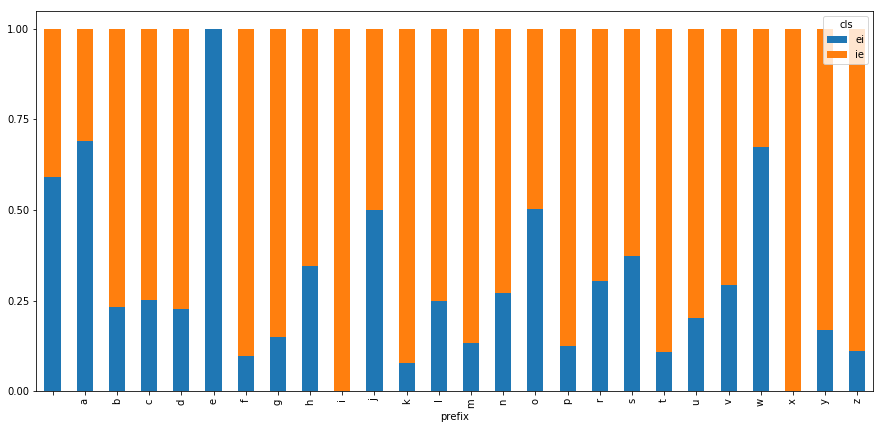

In [12]:
by_cls_pct = by_cls.div(by_cls.sum(1), axis=0)

ax = by_cls_pct.plot(kind='bar', stacked=True, figsize=(15, 7))
ax.set_yticks([0, .25, .5, .75, 1])
pass

In [ ]:
# Save the analysis dataset for future use (and Excel)
df.to_csv('./data/derived/words_of_interest.csv', index=False)

# Summary
 - e, w, and {start} may be better prefixes for our heuristic